# Lab 08

## Name: Xinyu Chang

---

In [39]:
# import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

## 1 Preparation

#### 1. Load data airbnb-bangkok-score.csv.bz2.

In [40]:
air_df = pd.read_csv("airbnb-bangkok-score.csv.bz2", sep = "\t")
air_df.head()

,price,minimum_nights,maximum_nights,instant_bookable,neighbourhood,reviews_per_month,calculated_host_listings_count,number_of_reviews,x1,x2,...,x24,x25,x26,x27,x28,x29,x30,highScore,firstReview,lastReview
0,2300.0,1,1125,t,"Bangkok, Thailand",0.04,8,1,O,N,...,P,N,E,P,B,O,H,False,2019,2019
1,360.0,1,1125,f,"Khet Phra Nakhon, Krung Thep Maha Nakhon, Thai...",0.04,1,1,L,U,...,M,N,M,T,W,K,L,True,2020,2020
2,1017.0,1,180,t,NaN,0.13,188,2,K,K,...,A,T,Q,G,J,B,D,True,2020,2021
3,3500.0,1,30,t,NaN,0.04,5,1,U,D,...,L,M,N,M,G,X,I,True,2019,2019
4,729.0,1,180,t,NaN,0.28,188,8,S,H,...,V,G,U,K,O,M,P,True,2019,2019


#### 2. A quick descriptive analysis: 
#### a. how many cases do we have? 

In [41]:
air_df.shape[0]

2000

There are 2000 cases we have in the dataset.

#### b. How many variables do we have? 

In [42]:
air_df.shape[1]

41

There are 41 variables we have in the dataset.

#### c. What are the variable names?

In [43]:
air_df.columns.tolist()

['price',
 'minimum_nights',
 'maximum_nights',
 'instant_bookable',
 'neighbourhood',
 'reviews_per_month',
 'calculated_host_listings_count',
 'number_of_reviews',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 'x26',
 'x27',
 'x28',
 'x29',
 'x30',
 'highScore',
 'firstReview',
 'lastReview']

#### d. What are the data types?

In [44]:
air_df.dtypes

price                             float64
minimum_nights                      int64
maximum_nights                      int64
instant_bookable                   object
neighbourhood                      object
reviews_per_month                 float64
calculated_host_listings_count      int64
number_of_reviews                   int64
x1                                 object
x2                                 object
x3                                 object
x4                                 object
x5                                 object
x6                                 object
x7                                 object
x8                                 object
x9                                 object
x10                                object
x11                                object
x12                                object
x13                                object
x14                                object
x15                                object
x16                               

#### 3. Your outcome variable is highScore. Let’s call it y for consistency. Check what kind of values does it contain.

In [45]:
air_df['highScore'].value_counts()

True     1017
False     983
Name: highScore, dtype: int64

The 'highScore' variable in the dataset is a binary variable, as it contains only two distinct values: True and False. This suggests that it is likely a categorical variable that has been encoded.In this context, the 'highScore' variable probably indicates whether a particular listing received a high score or not, with True indicating a high score and False indicating that the listing did not receive a high score. The output shows that there are 1017 listings with a high score and 983 listings without a high score.

#### 4. Create “full” design matrices X for training and validation, those should contain all variables there, except “highScore”.

In [46]:
X = air_df.drop('highScore', axis=1)
y = air_df["highScore"]

#### 5. Why do we want to remove highScore from the design matrix?

'highScore' is removed from the design matrix because it is the target variable that we want to predict. The model is trained using the features (the predictors or X variables) to predict the target (the outcome or y variable). Including the target variable in the predictors would lead to an overly optimistic model performance, as the model would have direct access to the values it is trying to predict during the training phase. This is unrealistic in practice, as the goal is to be able to make accurate predictions for new, unseen data where the target values are not known.

## 2 Train and validate

#### 1. Write a loop over all columns of your design matrix as suggested above. Inside the loop:

#### a. Create a smaller design matrix Xj that only contains the first j columns. (See above.)

#### b. Convert this matrix to dummies (use pd.get dummies). How many columns are now in your “dummy” design matrix Xd?

#### c. Split the dummy-matrix into training and validation parts.

#### d. Fit the logistic regression on the training chunk.

#### e. Compute, and store, both the training and validation accuracy

In [47]:
train_accuracy = []
val_accuracy = []

for j in range(1, X.shape[1]+1):
    Xj = X.iloc[:, :j]

    Xd = pd.get_dummies(Xj)
    print(f"There are now {Xd.shape[1]} columns in the dummy design matrix Xd.")

    Xd_train, Xd_val, yd_train, yd_val = train_test_split(Xd, y, test_size=0.5)

    model = LogisticRegression(max_iter=5000)
    model.fit(Xd_train, yd_train)

    train_accuracy.append(model.score(Xd_train, yd_train))
    val_accuracy.append(model.score(Xd_val, yd_val))

There are now 1 columns in the dummy design matrix Xd.
There are now 2 columns in the dummy design matrix Xd.
There are now 3 columns in the dummy design matrix Xd.
There are now 5 columns in the dummy design matrix Xd.
There are now 229 columns in the dummy design matrix Xd.
There are now 230 columns in the dummy design matrix Xd.
There are now 231 columns in the dummy design matrix Xd.
There are now 232 columns in the dummy design matrix Xd.
There are now 258 columns in the dummy design matrix Xd.
There are now 284 columns in the dummy design matrix Xd.
There are now 310 columns in the dummy design matrix Xd.
There are now 336 columns in the dummy design matrix Xd.
There are now 362 columns in the dummy design matrix Xd.
There are now 388 columns in the dummy design matrix Xd.
There are now 414 columns in the dummy design matrix Xd.
There are now 440 columns in the dummy design matrix Xd.
There are now 466 columns in the dummy design matrix Xd.
There are now 492 columns in the dummy 

There are 1014 columns I get in the “dummy” design matrix Xd.

#### 2. Plot your results: accuracy versus number of columns.

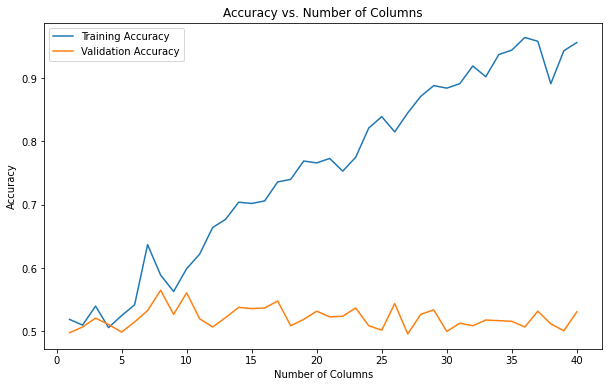

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(1, X.shape[1]+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, X.shape[1]+1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Number of Columns')
plt.xlabel('Number of Columns')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 3. Which number of columns will give you the best results? (Based on validation data.)

In [50]:
val_accuracy.index(max(val_accuracy)) + 1

8

I got the best results when the column number is 8. As the graphs shows, it starts to increase from n=8 onward. The gap between the training accuracy and the validation accuracy is becoming larger.This is evident as the model exhibits high performance on the training data, but the validation one rather falls which performs poorly, suggesting that it fails to generalize well to unseen data. so we can say it is an overfitting phenomenon. When the n is less than 8, it shows an undefitting phenomenon.When both the training and validation accuracies are low and exhibit a similar trend on the graph, it suggests that the model is underfitting. This means that the model is not complex enough or does not have enough capacity to capture the patterns in the data, leading to poor performance both during training and on new data.

## 3 Other models

### 3.1 Decision trees


#### 1. Create new design matrix out of 8 first columns of X and convert it to dummes.

In [51]:
Xd = pd.get_dummies(X.iloc[:, :8])

#### 2. Split it to training and validation chunks.

In [52]:
Xd_train, Xd_val, yd_train, yd_val = train_test_split(Xd, y, test_size=0.5)

---

#### 1. Now loop over a decision trees with max depth from 1 to 20. Inside of the loop:

#### (a) fit the decision tree of the respective depth on the training data

#### (b) Compute, and store, both the training and validation accuracy.

In [53]:
train_accuracy = []
val_accuracy = []

for d in range(1, 21):
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(Xd_train, yd_train)

    train_accuracy.append(model.score(Xd_train, yd_train))
    val_accuracy.append(model.score(Xd_val, yd_val))

#### 2. Plot your results: accuracy versus number of columns.

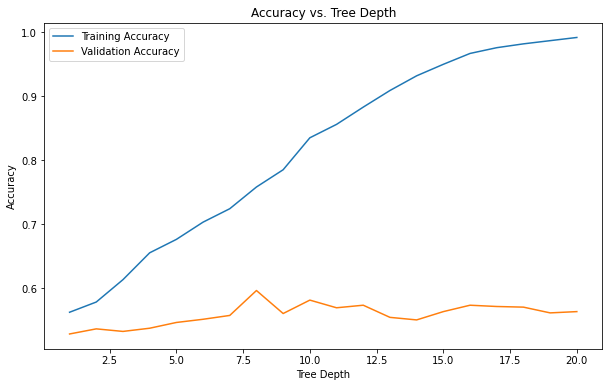

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 3. Which number of columns will give you the best results? (Based on validation data.)

In [55]:
val_accuracy.index(max(val_accuracy)) + 1

8

I got the best results when the column number is 8. As the graphs shows, it starts to increase from n=8 onward. The gap between the training accuracy and the validation accuracy is becoming larger.This is evident as the model exhibits high performance on the training data, but the validation one rather falls which performs poorly, suggesting that it fails to generalize well to unseen data. so we can say it is an overfitting phenomenon. When the n is less than 8, it shows an undefitting phenomenon.When both the training and validation accuracies are low and exhibit a similar trend on the graph, it suggests that the model is underfitting. This means that the model is not complex enough or does not have enough capacity to capture the patterns in the data, leading to poor performance both during training and on new data.

### 3.2 Extra task: k-NN (not graded)

#### If you have time and interest, repeat the previous task (decision trees) with k-NN:
#### 1. This time try models with different number of neighbors, k, instead of max depth. Test k in range 1-20.

In [56]:
train_accuracy = []
val_accuracy = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Xd_train, yd_train)

    train_accuracy.append(model.score(Xd_train, yd_train))
    val_accuracy.append(model.score(Xd_val, yd_val))

#### Make a similar plot and discuss what is the best k range.

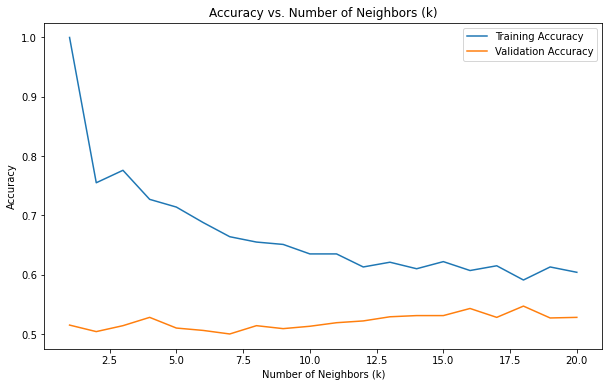

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 21), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [58]:
val_accuracy.index(max(val_accuracy)) + 1

18

#### 2. Explain why the training accuracy curve is decreasing in k, not increasing in number of columns, or in max depth as in case of logistic and trees.

In logistic regression and decision trees, as we add more columns or increase the tree depth, we're essentially making the model more complex. A more complex model can capture more patterns in the data, which can improve accuracy on the training set. However, this also makes the model more prone to overfitting, which can harm its performance on the validation set.

In k-NN, as we increase k, we're essentially making the model less complex. A k-NN model with a small k value is highly sensitive to noise in the training data, since it only considers the nearest few points. As we increase k, the model becomes more robust to noise, but it also becomes less sensitive to useful patterns in the data. This is why training accuracy tends to decrease as k increases.

For the optimal k, it will typically be a balance between overfitting (choosing too small a k) and underfitting (choosing too large a k). This balance will be reflected in the validation accuracy, which should peak at the optimal k.